<a href="https://colab.research.google.com/github/ravi-prakash1907/A-tracking-of-COVID-19/blob/master/metaverse_%26_healthcare/notebooks/Analyze_Papers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing Metaverse Papers

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# constants
dfLoc = "https://raw.githubusercontent.com/ravi-prakash1907/metaverse_in_healthcare/main/metaverse_%26_healthcare/dataset/categorized/metverseTitled_scopusPapers.csv?token=GHSAT0AAAAAAB5NKIJY57ZRD76NYEQCUXPOY7M2VEQ"

In [3]:
# data fetching
df = pd.read_csv(dfLoc)
print("Shape:",df.shape)

Shape: (67, 11)


In [4]:
# adding years' columns
df.cover_date = pd.to_datetime(df.cover_date)
years = []
for date in df.cover_date:
  years.append(date.year)
# new col
df['year'] = years
colNewNames = ['scopus_id','year']
colNewNames.extend(list(df.columns[1:-1]))
#reorder
df = df[colNewNames]

In [5]:
print("Shape:",df.shape)
df.head()

Shape: (67, 12)


,scopus_id,year,cover_date,title,sub_type,cite_count,first_author,publication,type,country,doi,url
0,scopus_id:85146563507,2023,2023-01-01,virtual reality relaxation for people with men...,review,0,riches s.,social psychiatry and psychiatric epidemiology,journal,united kingdom,10.1007/s00127-022-02417-5,https://www.scopus.com/inward/record.uri?partn...
1,scopus_id:85147119905,2022,2022-12-01,highlighting effects of flipped learning on me...,article,0,guo b.,american journal of health behavior,journal,china,10.5993/ajhb.46.6.11,https://www.scopus.com/inward/record.uri?partn...
2,scopus_id:85142834431,2022,2022-12-01,effects of virtual reality-based interventions...,review,0,li g.,international journal of nursing studies,journal,china,10.1016/j.ijnurstu.2022.104378,https://www.scopus.com/inward/record.uri?partn...
3,scopus_id:85128455231,2022,2022-05-01,automated virtual reality therapy to treat ago...,article,13,freeman d.,the lancet psychiatry,journal,united kingdom,10.1016/s2215-0366(22)00060-8,https://www.scopus.com/inward/record.uri?partn...
4,scopus_id:85109259714,2022,2022-02-01,the impact of virtual reality exposure on stre...,article,0,chaabane s.,journal of traumatic stress,journal,belgium,10.1002/jts.22690,https://www.scopus.com/inward/record.uri?partn...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   scopus_id     67 non-null     object        
 1   year          67 non-null     int64         
 2   cover_date    67 non-null     datetime64[ns]
 3   title         67 non-null     object        
 4   sub_type      67 non-null     object        
 5   cite_count    67 non-null     int64         
 6   first_author  67 non-null     object        
 7   publication   67 non-null     object        
 8   type          67 non-null     object        
 9   country       67 non-null     object        
 10  doi           67 non-null     object        
 11  url           67 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 6.4+ KB


---

#### Important Functions

In [7]:
def freqCounter(gotDF, aggrOnCol):
  cols,counts = [],[]
  uniqueVals = gotDF[aggrOnCol]#.unique()
  # iterating through values
  for col in set(uniqueVals):
    #print(col)
    cols.append(col)
    counts.append(sum(uniqueVals == col))
  # creating df
  tempDF = pd.DataFrame()
  tempDF[aggrOnCol] = cols
  tempDF['totalPub'] = counts
  # returning results
  tempDF.sort_values(by='totalPub', axis=0, inplace=True, ascending=False)
  tempDF.reset_index(drop=True, inplace=True)
  return tempDF

### Splitting Dataset

In [8]:
# article with doi
doiArtDF = df[df['doi'] != 'no_doi']
print("Total data with valid doi:  ",doiArtDF.shape[0])

# article with doi
no_doiArtDF = df[df['doi'] == 'no_doi']
print("Total data without valid doi:  ",no_doiArtDF.shape[0])

Total data with valid doi:   62
Total data without valid doi:   5


In [9]:
# articles after 2019
latestArtDF = df[df['year'] > 2019]
print("Total papers published after 2019:  ",latestArtDF.shape[0])

# articles between [2017,2019]
tempDF = df[df['year'] <= 2019]
newArtDF = tempDF[tempDF['year'] > 2016]
print("Total papers published between 2017 and 2019:  ",newArtDF.shape[0])

# articles before 2019
oldArtDF = df[df['year'] <= 2016]
print("Total papers published till 2016:  ",oldArtDF.shape[0])

Total papers published after 2019:   23
Total papers published between 2017 and 2019:   20
Total papers published till 2016:   24


In [10]:
### exporting
latestArtDF.to_csv("latestArticles.csv", index=False)
newArtDF.to_csv("newArticles.csv", index=False)
oldArtDF.to_csv("oldArticles.csv", index=False)

### Visualization

#### Functions

In [11]:
# possible catagorical vars.
catagoricals = dict({'sub_type':"Submission Type", 'publication': "Name of Publisher", 'type': "Publication Type", 'country': "Country"})

In [12]:
def getPiChart(gotDF,targetCol,labelNames=catagoricals):
  df = freqCounter(gotDF, targetCol)
  label = df[df.columns[0]]
  counts = df[df.columns[1]]
  # Creating plot
  fig = plt.figure(figsize =(10, 7))
  plt.pie(counts, labels = label)
  # show plot
  print("Plot for '{}':\n{}\n".format(labelNames[targetCol],'-'*15))
  plt.show()
  return

In [13]:
def getBarPlot(gotDF,targetCol,labelNames=catagoricals,w=25,h=10,color='g'):
  # getting bulk data
  plotDF = freqCounter(gotDF, targetCol)
  gotDict = pd.Series(plotDF[plotDF.columns[1]].values,index=plotDF[targetCol]).to_dict()
  # bar-plot prep
  f = plt.figure()
  f.set_figwidth(w)
  f.set_figheight(h)
  plt.xticks(rotation='vertical')
  plt.bar(list(gotDict.keys()), gotDict.values(), color=color)
  # show plot
  plt.xlabel(labelNames[targetCol])
  plt.ylabel('Publication / Article Count')
  plt.show()
  return

#### Applied

Plot for 'Submission Type':
---------------



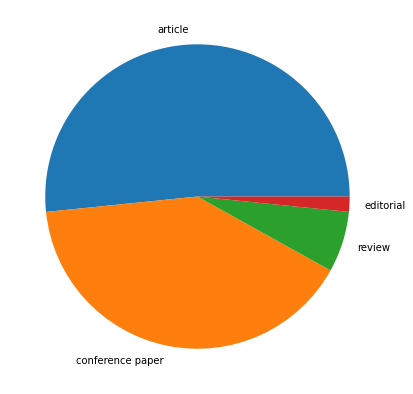

Plot for 'Publication Type':
---------------



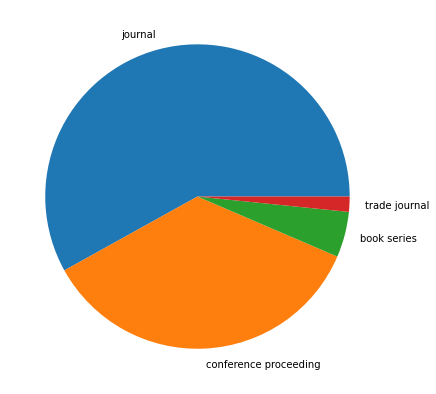

In [14]:
for col in ['sub_type', 'type']:
  getPiChart(doiArtDF,col)

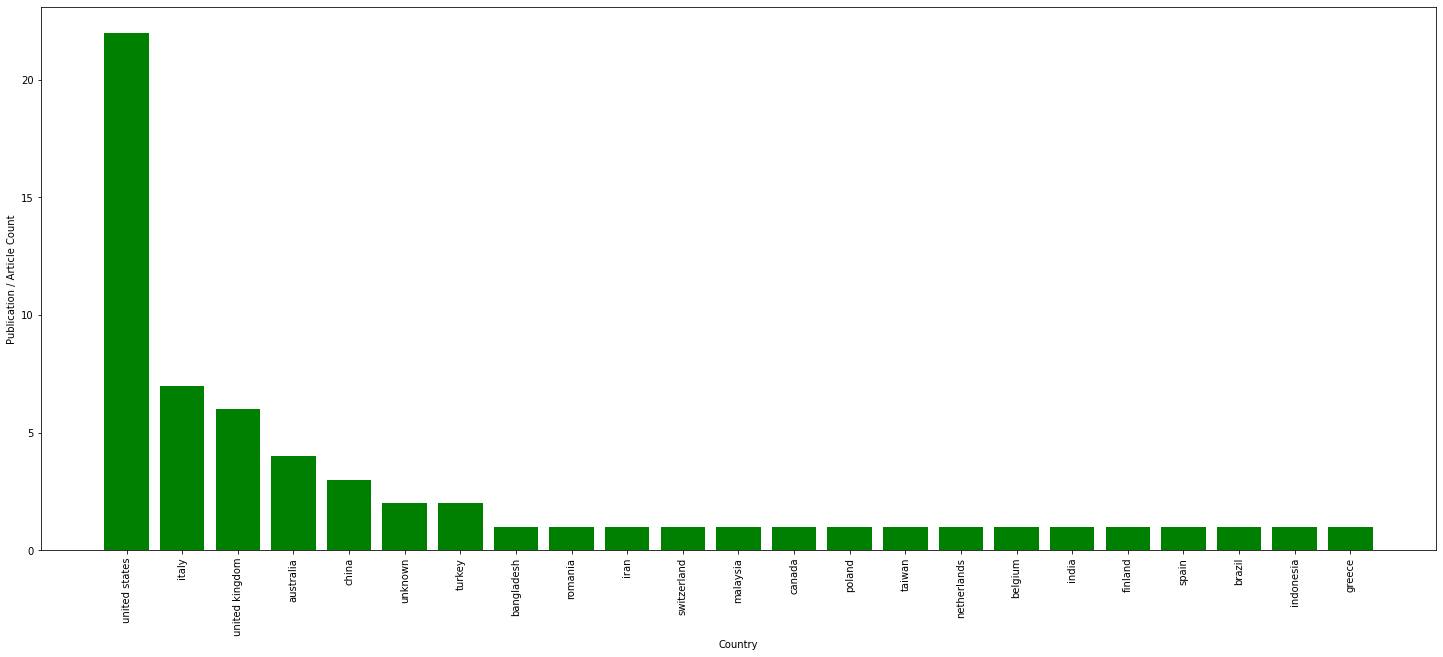

In [15]:
getBarPlot(doiArtDF,'country')

---